In [54]:
import psycopg2
import psycopg2.extras
import json
import pandas as pd
from dateutil.parser import parse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pymongo import MongoClient
import pprint
from bson.objectid import ObjectId
from bson.son import SON

In [2]:
# making sure psycopg2 is installed correctly

conn = psycopg2.connect("dbname=template_postgis user=koalaboy808 host=localhost password=koala444")
#conn = psycopg2.connect("dbname=postgres user=carlo_liquido host=localhost password=koala444")
cur = conn.cursor()
cur.execute("""SELECT srtext FROM spatial_ref_sys WHERE srid = 32610;""")
rows = cur.fetchall()
for row in rows:
    print(" ", row)
    #print(" ", row[1])

  ('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],AUTHORITY["EPSG","32610"],AXIS["Easting",EAST],AXIS["Northing",NORTH]]',)


In [2]:
with open('tweets_1M.json','r') as f:
    tweets = json.load(f)
    tweets = tweets[:100000]
type(tweets)

list

In [3]:
tweets_df = pd.DataFrame(tweets)
len(tweets_df)

100000

In [4]:
tweets_df[:5]

,id,lat,lng,text,timeStamp,user_id
0,377652254096228352,37.446100,-121.883557,@Tanner_Cortez hey checkout the website: http:...,Wed Sep 11 04:38:08 +0000 2013,224874450
1,377652255346159616,34.087406,-117.462604,@Lennayy7 😪,Wed Sep 11 04:38:08 +0000 2013,312179473
2,377652262325456897,37.356131,-121.842867,i laugh a lot with that line,Wed Sep 11 04:38:10 +0000 2013,54351774
3,377652264682655744,37.364664,-122.009629,sons of anarchy is back on woop woop,Wed Sep 11 04:38:11 +0000 2013,343219606
4,377652271116722176,37.382600,-121.995000,Drinking a Fresh Squeezed IPA by @deschutesbee...,Wed Sep 11 04:38:12 +0000 2013,1569395935


In [6]:
# loc=[]
# for i in range(100001):
#     loc.append(Point(tweets1[i][u'lat'],tweets1[i][u'lng']))
#     cur.execute("INSERT INTO Tweets(id, userid, loc, ￼time, text) VALUES (%s, %s, ST_GeomFromText(%s',SRID='%s),%s, %s)", 
#                 (tweets1[i][u'id'], tweets1[i][u'user_id'], loc[i], '4326',  str(tweets1[i][u'timeStamp']), 
#                  str(tweets1[i][u'text'])))

In [4]:
# restructures the DataFrame into values for json
tweets_array = tweets_df.values
tweets_array

array([[377652254096228352, 37.44609999, -121.88355687,
        '@Tanner_Cortez hey checkout the website: http://t.co/LuktJ6hiws',
        'Wed Sep 11 04:38:08 +0000 2013', 224874450],
       [377652255346159616, 34.08740583, -117.46260401, '@Lennayy7 😪',
        'Wed Sep 11 04:38:08 +0000 2013', 312179473],
       [377652262325456897, 37.3561311, -121.8428674,
        'i laugh a lot with that line', 'Wed Sep 11 04:38:10 +0000 2013',
        54351774],
       ..., 
       [378989681280438273, 37.80718131, -122.43718131,
        'Gara 7 @americascup #sf @fabricapo @internetliving @mmarinucci @MauroBattocchi http://t.co/dy6WC3luGA',
        'Sat Sep 14 21:12:35 +0000 2013', 344090031],
       [378989693112557568, 37.64564767, -122.45534238,
        '@dark_Jero esto fue un twist de alguien q sabe de fútbol. Te felicito',
        'Sat Sep 14 21:12:38 +0000 2013', 83863047],
       [378989698338676736, 37.45943124, -122.13718755,
        '✨Happiest place on Earth✨ http://t.co/EDBFDT5e3P',
 

In [9]:
#conn.rollback()
#cur.execute("CREATE TABLE Tweets2 (id varchar, userid varchar, location geometry, time timestamptz, text varchar);")

In [6]:
cur.execute("TRUNCATE Tweets")
conn.commit()

NameError: name 'cur' is not defined

In [97]:
#conn.rollback()
for i in range(len(tweets_array)):
    loc = 'Point('+str(tweets_array[i][2])+' '+str(tweets_array[i][1])+')'
    #print loc
    time = parse(tweets_array[i][4])
    #print time
    cur.execute("INSERT INTO Tweets(id, userid, location,time, text) VALUES (%s, %s, ST_GeomFromText(%s,%s),%s, %s)",
                (str(tweets_array[i][0]), str(tweets_array[i][5]), loc, 4326, time, tweets_array[i][3].encode('utf-8').strip()));
conn.commit()
cur.close()
conn.close()

In [10]:
# checking to see the lat coordinates

for i in range(10):
    print(str(tweets_array[2][1
                             ]))
#len(set(tweets_df[u'user_id']))

37.3561311
37.3561311
37.3561311
37.3561311
37.3561311
37.3561311
37.3561311
37.3561311
37.3561311
37.3561311


below is command line instructions for reshaping shapefile into psql and creting a table with that data


In [ ]:
# shp2pgsql -I -W "latin1" -s 4326 tl_2010_06_county10/tl_2010_06_county10.shp public.ca_census_tract | psql -d template_postgis
# Shapefile t

** was not able to access ca_census_tract so executed the following code in sql:**
ALTER ROLE koalaboy808 WITH SUPERUSER;

In [5]:
DSN = "dbname=template_postgis user=koalaboy808 host=localhost password=koala444"

with psycopg2.connect(DSN) as connection:
      with connection.cursor() as cur:
            cur.execute("SELECT * FROM ca_census_tract;")
            census_column_names = [row[0] for row in cur.description]

census_column_names

['gid',
 'statefp10',
 'countyfp10',
 'countyns10',
 'geoid10',
 'name10',
 'namelsad10',
 'lsad10',
 'classfp10',
 'mtfcc10',
 'csafp10',
 'cbsafp10',
 'metdivfp10',
 'funcstat10',
 'aland10',
 'awater10',
 'intptlat10',
 'intptlon10',
 'geom']

In [27]:
### OLD CODE
# conn = psycopg2.connect("dbname=template_postgis user=koalaboy808 host=localhost password=koala444")
# #conn = psycopg2.connect("dbname=postgres user=carlo_liquido host=localhost password=koala444")
# cur = conn.cursor()
# #cur.execute("GRANT ALL PRIVILEGES ON TABLE ca_census_tract TO koalaboy808;")
# cur.execute("SELECT * FROM ca_census_tract;")

# cols = cur.fetchall()
# for col in cols:
#     print(" ", col)

In [6]:
with psycopg2.connect(DSN) as connection:
      with connection.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur:
            cur.execute("SELECT * FROM ca_census_tract;")
            # fetches first one
#             rec = cur.fetchone()
            # fetches all rows in dictionary format... but as a list
            rec = cur.fetchall()
            ans1 = [dict(row) for row in rec]
            #census_column_dict = [row[0] for row in cur.description]
len(ans1)
#cursor = con.cursor(cursor_factory=psycopg2.extras.DictCursor)

58

### Number of tweets in the Contra Costa County

In [7]:
with psycopg2.connect(DSN) as connection:
      with connection.cursor() as county:
            #county.execute("SELECT geom FROM ca_census_tract WHERE ca_census_tract.namelsad10='Contra Costa County';")
            #geom = [row for row in county.fetchall()]
            #county.execute("SELECT location FROM tweets2 WHERE ")
            #county.execute("SELECT COUNT(*) FROM (SELECT ca_census_tract.geom FROM ca_census_tract WHERE ca_census_tract.namelsad10='Contra Costa County') as Conta, tweets WHERE ST_Contains(Conta.geom, tweets.location);")
            county.execute("SELECT COUNT(*) FROM tweets INNER JOIN ca_census_tract ON ST_Contains(ca_census_tract.geom, tweets.location) WHERE ca_census_tract.namelsad10='Contra Costa County';")
            for number in county:
                print(number[0])
#(geom[0][0])

# SELECT  ST_Intersection(a.geom, b.geom) As intersect_ab
#     FROM a INNER JOIN b ON ST_Intersection(a,b)
#     WHERE ST_Overlaps(a.geom, b.geom)
#     ;

1951


**list counties reference... and for the fun of it**

In [8]:
with psycopg2.connect(DSN) as connection:
      with connection.cursor() as list_county:
            list_county.execute("SELECT namelsad10 FROM ca_census_tract;")
            list_county_names = [county[0] for county in list_county]
list_county_names

['Orange County',
 'Tehama County',
 'Colusa County',
 'Santa Barbara County',
 'Mono County',
 'Monterey County',
 'Placer County',
 'Amador County',
 'Calaveras County',
 'Imperial County',
 'Siskiyou County',
 'Sonoma County',
 'Santa Clara County',
 'Kern County',
 'Yolo County',
 'Mendocino County',
 'Sacramento County',
 'Madera County',
 'Yuba County',
 'Tulare County',
 'San Diego County',
 'Plumas County',
 'San Benito County',
 'Shasta County',
 'Stanislaus County',
 'Mariposa County',
 'Fresno County',
 'Alpine County',
 'Marin County',
 'Glenn County',
 'Lassen County',
 'Del Norte County',
 'Napa County',
 'San Luis Obispo County',
 'San Mateo County',
 'Nevada County',
 'San Joaquin County',
 'San Bernardino County',
 'Sutter County',
 'Riverside County',
 'Trinity County',
 'Contra Costa County',
 'Ventura County',
 'Tuolumne County',
 'Butte County',
 'Sierra County',
 'Lake County',
 'Modoc County',
 'El Dorado County',
 'Los Angeles County',
 'Alameda County',
 'Inyo 

In [9]:
with psycopg2.connect(DSN) as connection:
      with connection.cursor() as county:
            county.execute("SELECT COUNT(*) FROM tweets INNER JOIN ca_census_tract ON ca_census_tract.namelsad10 = 'Alameda County' AND ST_Distance_Sphere(ca_census_tract.geom, tweets.location) > 160934;")
            #county.execute("SELECT * FROM tweets INNER JOIN ca_census_tract WHERE ST_Distance_Sphere((SELECT ca_census_tract.geom FROM ca_census_tract WHERE ca_census_tract.namelsad10='Alameda County'), tweets.location) <= 160934;")
            Alameda_county = county.fetchall()
            Alameda_county[0][0]

                
#                 SELECT *
# FROM your_table
# WHERE ST_Distance_Sphere(the_geom, ST_MakePoint(your_lon,your_lat)) <= radius_mi * 1609.34

In [10]:
Alameda_county[0][0]

16434

### how to copy csv data into a datatable
##### STEP 1: create empty data table (after loading csv file)
    $ psql dbname
    dbname-# CREATE EXTENSION postgis;
    dbname-# CREATE TABLE ca_census_data
    (GEOID varchar(11),
    SUMLEV varchar(3),
    STATE varchar(2),
    COUNTY varchar(3),
    CBSA varchar(5),
    CSA varchar(3),
    NECTA integer,
    CNECTA integer,
    NAME varchar(30),
    POP100 integer,
    HU100 integer,
    POP1002000 integer,
    HU1002000 integer,
    P001001 integer,
    P0010012000 integer);

### STEP 2: copy csv file and pip into table
cat pop_hw2.csv | psql -d template_postgis -c 'COPY ca_census_data FROM STDIN WITH CSV HEADER'

In [11]:
# with psycopg2.connect(DSN) as connection:
#       with connection.cursor() as county:
            
# #             county.execute("\
# #             SELECT COUNT(*), ca_census_tract.namelsad10 \
# #             FROM ca_census_tract INNER JOIN tweets \
# #             ON ST_Contains(ca_census_tract.geom, tweets.location) \
# #             GROUP BY namelsad10;\
# #             ")

#             county.execute("\
#             SELECT COUNT(*), ca_census_tract.namelsad10 \
#             FROM \
#             (SELECT ca_census_tract.namelsad10, ca_census_data.pop100 \
#             FROM ca_census_tract \
#             INNER JOIN ca_census_data ON ca_census_data.name = ca_census_tract.namelsad10) as alias, tweets\
#             ON ST_Contains(alias.geom, tweets.location) \
#             GROUP BY namelsad10;\
#             ")
    
#             all_counties = county.fetchall()

# # SELECT s.studentname
# #     , s.studentid
# #     , s.studentdesc
# #     , h.hallname
# # FROM students s
# # INNER JOIN hallprefs hp
# #     on s.studentid = hp.studentid
# # INNER JOIN halls h
# #     on hp.hallid = h.hallid

In [52]:
# print(len(all_counties))

# for county in all_counties:
#     print(county)

# print(len(all_counties))

In [9]:
with psycopg2.connect(DSN) as connection:
      with connection.cursor() as population:
            population.execute("\
            SELECT alias.namelsad10, (CAST(COUNT(*) AS FLOAT)/ CAST(alias.pop100 AS FLOAT)) \
            FROM \
            (SELECT ca_census_tract.namelsad10, ca_census_tract.geom, ca_census_data.pop100 \
            FROM ca_census_tract \
            INNER JOIN ca_census_data ON ca_census_data.name = ca_census_tract.namelsad10) as alias, tweets\
            WHERE ST_Contains(alias.geom, tweets.location) \
            GROUP BY alias.namelsad10, alias.pop100;")
            population_counties = population.fetchall()
            
#             county.execute("\
#             SELECT COUNT(*), ca_census_tract.namelsad10 \
#             FROM \
#             (SELECT ca_census_tract.namelsad10, ca_census_data.pop100 \
#             FROM ca_census_tract \
#             INNER JOIN ca_census_data ON ca_census_data.name = ca_census_tract.namelsad10) as alias, tweets\
#             ON ST_Contains(alias.geom, tweets.location) \
#             GROUP BY namelsad10;\
#             ")        

In [10]:
print(len(population_counties))
for county in population_counties:
    print(county)

52
('Del Norte County', 0.00328556448794128)
('San Luis Obispo County', 0.00117565467647244)
('Sutter County', 0.00487665853890244)
('San Diego County', 0.000299808129258657)
('Calaveras County', 0.000175523278774848)
('Mariposa County', 0.000109583036545943)
('Mendocino County', 0.00363156157147573)
('San Mateo County', 0.0139063067627437)
('Lake County', 0.00315472048248666)
('Amador County', 0.00294032711139114)
('Napa County', 0.00520940183464728)
('San Joaquin County', 0.00250545012009234)
('Fresno County', 0.00047073996453329)
('Placer County', 0.000232470037195206)
('Lassen County', 0.000573148015474996)
('Alpine County', 0.000851063829787234)
('Santa Clara County', 0.0121230864562016)
('Madera County', 0.0015709409074338)
('Yolo County', 0.00222555252951222)
('Trinity County', 0.000507761497171043)
('Glenn County', 0.0128369248275372)
('Los Angeles County', 0.000389566542293941)
('Alameda County', 0.0110768199879359)
('Plumas County', 0.00264907282451142)
('San Benito County', 

In [11]:
population_counties = [(county[0],county[1]*100) for county in population_counties]

In [12]:
population_counties

[('Del Norte County', 0.32855644879412804),
 ('San Luis Obispo County', 0.117565467647244),
 ('Sutter County', 0.48766585389024397),
 ('San Diego County', 0.0299808129258657),
 ('Calaveras County', 0.0175523278774848),
 ('Mariposa County', 0.0109583036545943),
 ('Mendocino County', 0.36315615714757304),
 ('San Mateo County', 1.39063067627437),
 ('Lake County', 0.31547204824866604),
 ('Amador County', 0.294032711139114),
 ('Napa County', 0.520940183464728),
 ('San Joaquin County', 0.250545012009234),
 ('Fresno County', 0.047073996453329),
 ('Placer County', 0.0232470037195206),
 ('Lassen County', 0.05731480154749959),
 ('Alpine County', 0.0851063829787234),
 ('Santa Clara County', 1.2123086456201602),
 ('Madera County', 0.15709409074338002),
 ('Yolo County', 0.222555252951222),
 ('Trinity County', 0.0507761497171043),
 ('Glenn County', 1.28369248275372),
 ('Los Angeles County', 0.0389566542293941),
 ('Alameda County', 1.10768199879359),
 ('Plumas County', 0.264907282451142),
 ('San Beni

In [14]:
counties_list = population_counties[0]
per_capita_pop = population_counties[1]

plt.bar(counties_list, per_capita_pop, align='center')

# plt.bar(x2, y2, color='g', align='center')

plt.title('Epic Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')

plt.show()

In [28]:
plt.style.use('ggplot')

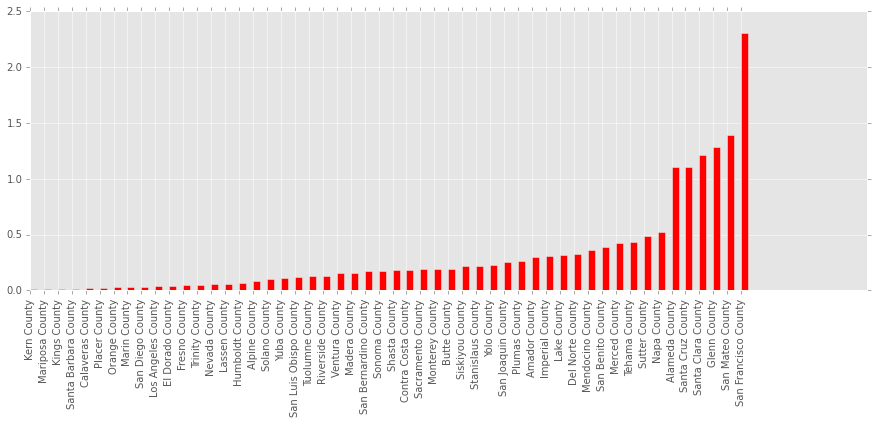

In [30]:
plt.figure(figsize=(15,5))

population_counties = sorted(population_counties, key=lambda tup:tup[1])

counties_list = [county[0] for county in population_counties]
per_capita_pop = [pop[1] for pop in population_counties]

N = len(population_counties)

counties_list = [county[0] for county in population_counties]
per_capita_pop = [pop[1] for pop in population_counties]

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

#fig, ax = plt.subplots()
rects1 = plt.bar(ind, per_capita_pop, width=width, color='r')

# plt.xticks(N + width, ('A', 'B', 'C', 'D', 'E'))
plt.xticks(range(N),counties_list, rotation=90)

plt.show()

##TASK III

In [32]:
tweets_df = pd.DataFrame(tweets_array, columns=['id','lat','lng','text', 'timeStamp','user_id'])
tweets_df.loc[tweets_df['id']==378189967014379520]


,id,lat,lng,text,timeStamp,user_id
16598,378189967014379520,34.09714,-118.3635,@DarrenArsenal1 Alexi Lalas,Thu Sep 12 16:14:49 +0000 2013,172710354


In [6]:
# with open('tweets_1M.json','r') as f:
#     tweets = json.load(f)
# (tweets)[:5]

In [6]:
mongo_client = MongoClient()
mongo_db = mongo_client.hw2_C263_db
tweets_collection = mongo_db.tweets
#mongo_client.close()

In [31]:
for i in range(len(tweets_array)):
    tweet = {'id': tweets_array[i][0] ,'text' : tweets_array[i][3],'user_id':tweets_array[i][5],'location' : {'type':'Point','coordinates':[tweets_array[i][2],tweets_array[i][1]]}}
    tweets_collection.insert(tweet)

In [13]:
tweets_collection

Collection(Database(MongoClient('localhost', 27017), 'hw2_C263_db'), 'tweets')

In [14]:
mongo_db.collection_names(include_system_collections=False)

['tweets', 'tweets_mongo_db']

In [37]:
tweets_collection.create_index([('location','2dsphere')])

'location_2dsphere'

In [38]:
pp = pprint.PrettyPrinter(indent=1)

user_tweets = tweets_collection.find({'user_id': 1138308091})
select_id = [tweet for tweet in user_tweets]
print(len(select_id))
pp.pprint(select_id)

2
[{'_id': ObjectId('561f730d4306f905e5a0cc49'),
  'id': 378189982248091648,
  'location': {'coordinates': [-122.40190047, 37.78914447], 'type': 'Point'},
  'text': 'According to a study at #UCBerkeley, each #tech #job in SF '
          'creates 5 nontech positions. Who am I supporting... Uber? '
          'laundry services? Food?',
  'user_id': 1138308091},
 {'_id': ObjectId('561f75554306f905e5a252e9'),
  'id': 378189982248091648,
  'location': {'coordinates': [-122.40190047, 37.78914447], 'type': 'Point'},
  'text': 'According to a study at #UCBerkeley, each #tech #job in SF '
          'creates 5 nontech positions. Who am I supporting... Uber? '
          'laundry services? Food?',
  'user_id': 1138308091}]


In [39]:
user_tweets_2 = tweets_collection.find({'id':(378189967014379520)})
select_id_2 = [tweet for tweet in user_tweets_2]
pp.pprint(select_id_2)

[{'_id': ObjectId('561f730d4306f905e5a0cc48'),
  'id': 378189967014379520,
  'location': {'coordinates': [-118.36353256, 34.0971366], 'type': 'Point'},
  'text': '@DarrenArsenal1 Alexi Lalas',
  'user_id': 172710354},
 {'_id': ObjectId('561f75554306f905e5a252e8'),
  'id': 378189967014379520,
  'location': {'coordinates': [-118.36353256, 34.0971366], 'type': 'Point'},
  'text': '@DarrenArsenal1 Alexi Lalas',
  'user_id': 172710354}]


In [14]:
# test_user_tweets = tweets_db.find({'user_id':1234})

# for tweet in test_user_tweets:
#     print(tweet)

In [62]:
for doc in tweets_collection.find({"location" : 
                                   SON([("$near", { "$geometry" : 
                                                   SON([("type", "Point"), 
                                                        ("coordinates", [-118.36353256, 34.0971366])])})])}).limit(10):
    pp.pprint(doc)

{'_id': ObjectId('561f730d4306f905e5a0cc48'),
 'id': 378189967014379520,
 'location': {'coordinates': [-118.36353256, 34.0971366], 'type': 'Point'},
 'text': '@DarrenArsenal1 Alexi Lalas',
 'user_id': 172710354}
{'_id': ObjectId('561f75554306f905e5a252e8'),
 'id': 378189967014379520,
 'location': {'coordinates': [-118.36353256, 34.0971366], 'type': 'Point'},
 'text': '@DarrenArsenal1 Alexi Lalas',
 'user_id': 172710354}
{'_id': ObjectId('561f731f4306f905e5a1dad1'),
 'id': 378804260684566528,
 'location': {'coordinates': [-118.3762633, 34.08889411], 'type': 'Point'},
 'text': 'لماذا لانعرف قيمة الوطن وافراده الا بمغادرته ؟ لاننا لا ندرك قيمة '
         'الشيء الا عندما نغقده',
 'user_id': 234142560}
{'_id': ObjectId('561f756b4306f905e5a36171'),
 'id': 378804260684566528,
 'location': {'coordinates': [-118.3762633, 34.08889411], 'type': 'Point'},
 'text': 'لماذا لانعرف قيمة الوطن وافراده الا بمغادرته ؟ لاننا لا ندرك قيمة '
         'الشيء الا عندما نغقده',
 'user_id': 234142560}
{'_id': 

In [72]:
poly_list = []
for poly in tweets_collection.find({"location" : 
                                   SON([("$geoWithin", { "$geometry" : 
                                                   SON([("type", "Polygon"), 
                                                        ("coordinates", [[[-122.412,37.810],[-122.412,37.804],[-122.403,37.806],[-122.407,37.810],[-122.412,37.810]]])])})])}):
    poly_list.append(poly)
    pp.pprint(poly)

    
#len(poly_list)
#     {'type':'Polygon','coordinates':[[[-122.412,37.810],[-
# 122.412,37.804],[-122.403,37.806],[-122.407,37.810],[-122.412,
# 37.810]]]}
    
# {
#    <location field>: {
#       $geoWithin: {
#          $geometry: {
#             type: <"Polygon" or "MultiPolygon"> ,
#             coordinates: [ <coordinates> ]
#          }
#       }
#    }
# }

{'_id': ObjectId('561f730d4306f905e5a0cddf'),
 'id': 378194217618907136,
 'location': {'coordinates': [-122.40468979, 37.80663069], 'type': 'Point'},
 'text': 'A visitar La Roca, aunque el día no acompaña mucho. Esperemos que '
         'mejore. (@ Alcatraz Cruises w/ 6 others) http://t.co/7Kp4p22Qi1',
 'user_id': 23316637}
{'_id': ObjectId('561f730e4306f905e5a0db47'),
 'id': 378228698219954178,
 'location': {'coordinates': [-122.40629983, 37.80731867], 'type': 'Point'},
 'text': 'Stay calm and watch Brother Theodore.',
 'user_id': 261008800}
{'_id': ObjectId('561f73104306f905e5a0ff00'),
 'id': 378308249226731520,
 'location': {'coordinates': [-122.40693, 37.80787], 'type': 'Point'},
 'text': 'Ayo cari es kriiiim...katanya es krim di pelabuhan sini enak 😋 (at '
         'Pier 39) [pic] — https://t.co/hPj2noWdEF',
 'user_id': 37024815}
{'_id': ObjectId('561f73114306f905e5a10743'),
 'id': 378324675010781184,
 'location': {'coordinates': [-122.40473536, 37.80665726], 'type': 'Point'},
 't

In [31]:
tweets_db.update({"user_id":1234},{"$set":{"cluster_id":12}})

{'n': 1, 'nModified': 0, 'ok': 1, 'updatedExisting': True}

In [33]:
test_user_tweets = tweets_db.find({'user_id':1234})

for tweet in test_user_tweets:
    print(tweet)

{'text': 'hello_world', 'user_id': 1234, 'location': {'coordinates': [-122.4167, 37.7833], 'type': 'Point'}, 'cluster_id': 12, '_id': ObjectId('561eeff09c4ed817f8bec5b6'), 'id': 1234}
{'text': 'hello_world', 'location': {'coordinates': [-122.4167, 37.7833], 'type': 'Point'}, '_id': ObjectId('561ef0509c4ed817f8bec5b7'), 'user_id': 1234, 'id': 1234}


In [34]:
use mydb

SyntaxError: invalid syntax (<ipython-input-34-5cf530a24cd3>, line 1)

In [37]:
mongo_client = MongoClient()
mongo_db = mongo_client.tweets_mongo_db
tweets_collection = mongo_db.tweets
# mongo_client.close()

In [36]:
#mongo_client.close()

In [ ]:
for i in range(len(tweets)):
    tweet = { 'id': tweets[i][0] ,
             'text' : tweets[i][3],
             'user_id':tweets[i][5],
             'location' : {'type':'Point','coordinates':[tweets[i][2],tweets[i][1]]}}
    tweets.insert(tweet)